In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud
from PIL import Image

%matplotlib inline

In [2]:
FILE = 'data/vch_revs.json'

df = pd.read_json(FILE)

In [3]:
df.head()

,rev
0,"[<p lang=""en"">Dr Lisa Zeelander <br>Has been m..."
1,"[<p lang=""en"">Dr Lisa Zeelander <br>Has been m..."
2,"[<p lang=""en"">Dr Lisa Zeelander <br>Has been m..."
3,"[<p lang=""en"">Dr Lisa Zeelander <br>Has been m..."
4,"[<p lang=""en"">Dr Lisa Zeelander <br>Has been m..."


In [4]:
df.shape

(69, 1)

In [5]:
def extract_quotes(df_series):
    reviews = set()
    for item in df_series:
        for val in item:
            val = val.replace('<p lang="en">', "").replace('</p>','').replace('<br>','').replace('  ',' ')
            reviews.add(val)
    return reviews

In [6]:
all_reviews = extract_quotes(df['rev'])

In [7]:
all_reviews = pd.Series(list(all_reviews))

In [8]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brandonkessler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brandonkessler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def process_text(text, stop_words=set(stopwords.words('english'))):
    words = word_tokenize(text.lower())
    other_exclusions = ['us', 'clinic','doctor','feel','need','needed',
                       'told','see','place','seen','go','patient','care',
                       'call','back','even','come','one','really',
                       'week','people','make']
    
    filtered_words = []
    
    for word in words:
        if word not in stop_words and\
            word not in other_exclusions and word.isalpha():
            filtered_words.append(word.upper())
    
    return filtered_words

In [10]:
processed_revs = all_reviews.apply(process_text)
all_processed_revs = " ".join([word for sublist in processed_revs for word in sublist])

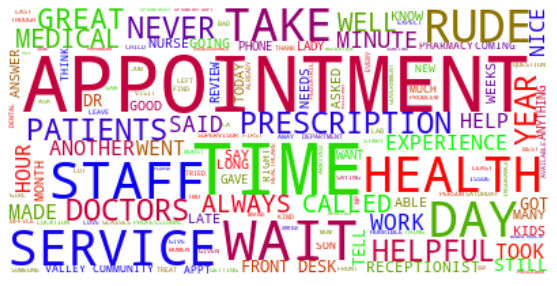

In [12]:
wc_all_processed_revs = WordCloud(background_color='white', max_words=5000, colormap='brg').generate(all_processed_revs)
plt.figure(figsize=[10, 5])
plt.imshow(wc_all_processed_revs, interpolation='bilinear')
plt.axis('off')
plt.show()